# Prácticas DFI 2024

**Progreso primera semana**

Hasta ahora hemos usado dos tipos de datos, los de la Tabla 4 del paper "A 6% measurement of the Hubble parameter at z~0.45: direct evicende of the epoch of cosmic re-acceleration", datos que se pueden observar en los archivos texto **hub_data.txt** (estos los tabuló el profesor), **hub_data_2.txt** (aquí solo se encuentran los del texto mencionado) y **hub_data_3.txt** (que une tanto los del texto como los del profesor en orden). Por otro lado, también hemos usado datos de Pantheon, tales como las magnitudes aparentes de supernovas. 

Lo que hemos logrado graficar es: 

1. $H(z)$ : parámetro de Hubble
2. $f(z) = \frac{H(z)}{(1+z)}$ : derivada del factor de escala
3. $D_L(z)$ : distancia de luminosidad
4. $m_b (z)$ : magnitud aparente de las supernova

Para ello hemos usado relaciones entre ambas 'bases de datos' como se explica a continuación. 

# Usando datos de Tabla 4

## Parámetro de Hubble: $H(z)$

Lo graficamos a partir de los datos de la Tabla 4 del paper "A 6% measurement of the Hubble parameter..." (paper 2 en GitHub). Se adjuntan las barras de error, además de ajustar una función polinomial (se usará la misma técnica para las demás funciones). 

Polinomio ajustado:        2
4.922 x + 59.87 x + 61.46


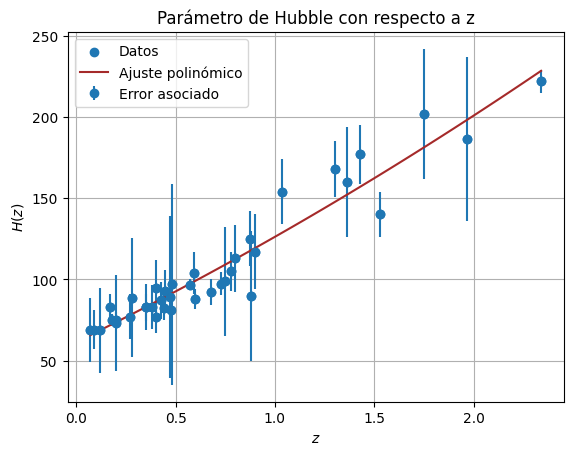

In [56]:
import numpy as np
import matplotlib.pyplot as plt

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

#print("z:", columna1)
#print("H(z):", columna2)
#print("Desviación estándar:", columna3)

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])


plt.errorbar(z, H, yerr=desv, fmt='o', label='Error asociado')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.grid(True)
plt.title('Parámetro de Hubble con respecto a z')


# Ajuste Lineal

coeficientes = np.polyfit(z, H, 2)

polinomio = np.poly1d(coeficientes)

print("Polinomio ajustado:", polinomio)

z_ajuste = np.linspace(min(z), max(z), 100)
D_ajuste = polinomio(z_ajuste)

plt.scatter(z, H, label='Datos')
plt.plot(z_ajuste, D_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
plt.show()


## Derivada de factor de escala: $f(z) = \frac{H(z)}{(1+z)} = \dot{a}$

En esta parte graficamos la función $f(z)$ con los datos ya mencionados. Para el ajuste polinómico tuvimos que separar los datos en dos, definiendo este punto de 'cambio' como z=0.5, valor similar a varios $z$ que definen la época en que el universo dejo de desacelerarse para empezar su fase de aceleración. Sabemos que este ajuste de los datos es ambiguo, por lo que pensamos cambiarlo a posterior. De todas maneras, se observa que hay cierto valor de $z$ donde la función cambia el signo de su derivada, tal que: 

1. $\ddot{a}<0$ : desaceleración
2. $\ddot{a}>0$ : aceleración

Este $z$ está cercano a $0.5$, pero definimos este valor con bastante ambiguedad. 

Polinomio ajustado:  
-10.64 x + 65.6


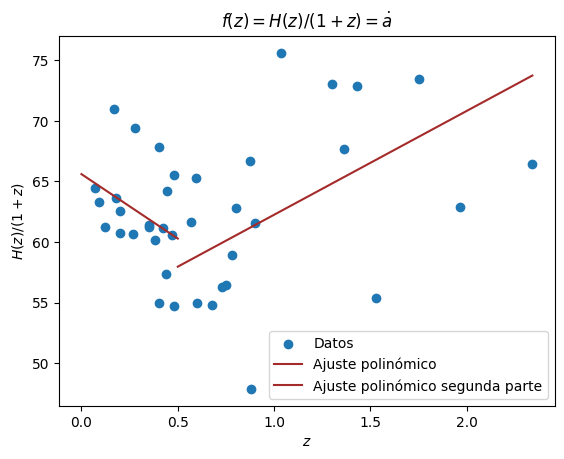

In [57]:
f = H/(1+z)

#print(f)

#Ajuste lineal

coeficientes_f = np.polyfit(z[0:20], f[0:20], 1)
coeficientes_f2 = np.polyfit(z[21:-1], f[21:-1], 1)

polinomio_f = np.poly1d(coeficientes_f)
polinomio_f2 = np.poly1d(coeficientes_f2)

print("Polinomio ajustado:", polinomio_f)

z_ajuste_f = np.linspace(0, 0.5, 100)
z_ajuste_f2 = np.linspace(0.5, max(z), 100)

f_ajuste = polinomio_f(z_ajuste_f)
f_ajuste_2 = polinomio_f2(z_ajuste_f2)

plt.scatter(z, f, label='Datos')
plt.plot(z_ajuste_f, f_ajuste, label='Ajuste polinómico', color='brown')
plt.plot(z_ajuste_f2, f_ajuste_2, label='Ajuste polinómico segunda parte', color='brown')
plt.xlabel('$z$')
plt.ylabel('$H(z)/(1+z)$')
plt.title('$f(z) = H(z)/(1+z) = \dot{a}$')
plt.legend()
plt.show()

Calculo de $D_L(z)$ a partir de la relación: 

$$D_L(z) = c\frac{1+z}{H_0}\int_0^z \frac{dz}{E(z)}$$


Para cada $z$ calculamos la integral de 0 hasta ese $z$. Por lo tanto, los valores de las integrales se van sumando. Se usó el método de los trapecios(*) tal que para cada intervalo de $[0, z]$ se calculó la integral como: 

$$\int_0^z \frac{dz}{E(z)} = \frac{(z - 0)(E(z)^{-1} + E(0)^{-1})}{2} $$

Definiendo las siguientes cantidades: 

1. $H_0 = 72$
2. $c = 3 \cdot 10^8$  

(*)nota: también traté de solo sumar rectángulos, y ambos métodos cambian la forma de la función. Mientras que los trapecios dan como resultado una función de forma más 'lineal', los rectángulos le añaden apariencia 'exponencial'. Por lo tanto, ambos se ajustan a modelos del universo donde hay energía oscura. 

Polinomio ajustado:  
8.941e+06 x - 1.377e+06


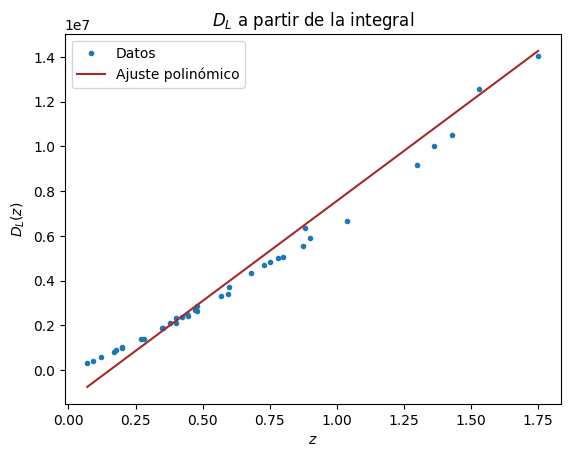

In [58]:
E = np.zeros(len(H))
integral = np.zeros(len(H))

c = 3e8
H_0 = 72

for i in range(len(H)): 
    E[i] = H[i]/H_0

for i in range(len(H)):
    integral[i] = (z[i] - 0)*(1/E[i] + 1/E[0]) / 2


D_LH = np.zeros(len(H))

for i in range(len(H)):
    D_LH[i] = c*((1+z[i])/H_0)*integral[i]

# Ajuste Lineal

coeficientes_ = np.polyfit(z, D_LH, 1)

z = z[0:-2]
D_LH = D_LH[0:-2]

polinomio_ = np.poly1d(coeficientes_)

print("Polinomio ajustado:", polinomio_)

# Genera puntos para la curva ajustada
z_ajuste_ = np.linspace(min(z), max(z), 100)
D_LH_ajuste = polinomio_(z_ajuste_)

plt.plot(z, D_LH, '.', label = "Datos")
plt.plot(z_ajuste_, D_LH_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$D_L(z)$')
plt.title('$D_L$ a partir de la integral')
plt.legend()
plt.show()


# Usando datos de Pantheon

Se usan datos de: lcparam_full_long.txt

En este caso solo se tenían las luminosidades aparentes, es decir, $m_b$, por lo que para calcular $D_L$ se usó la relación: 

$$m - M = 5log(D_L / Mpc) + 25$$

Tomando como la luminosidad absoluta de todas las supernova tipo Ia como una cantidad conocida e igual a $M = -19.3$. Por lo tanto: 

$$\frac{D_L}{Mpc} = 10^{(m - M - 25) / 5}$$

*Nota*: tenemos la duda se si se puede relacionar una distancia propia (o similar) que sea medible con la distancia de luminosidad. 

Para calcular el error asociado a las medidas de $D_L$ usamos la fórmula general de propagación de errores: 

$$\delta D_L = 2^{(m_b-M-25)/5}\cdot 5^{((m_b-M-25)/5 -1)} \cdot log(10) \cdot \delta m$$

## Distancia de Luminosidad: $D_L (z)$

[0.50309 0.4948  0.67767 ... 1.014   1.315   1.092  ]
[22.93445 22.8802  24.0377  ... 24.85445 25.54235 24.63835]
[0.12605 0.11765 0.2056  ... 0.2291  0.1987  0.26405]
Polinomio ajustado:       2
1105 x + 5363 x - 117.7


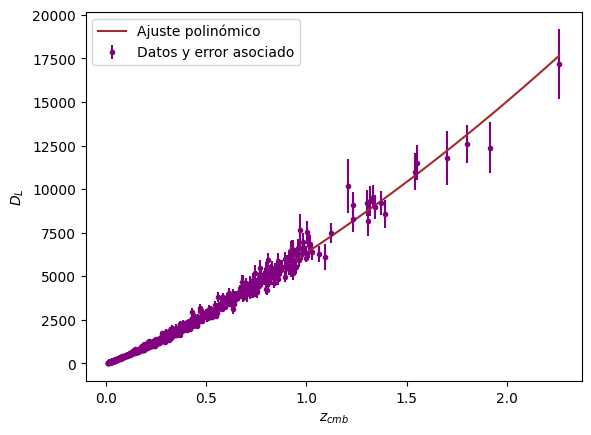

In [59]:
M=-19.3

columna2 = [] #z_cmb
columna4 = [] #m_b
columna5 = [] #desv_m

with open('c:/Users/ximen/Desktop/Practicas DFI/lcparam_full_long.txt', 'r') as archivo:
    for linea in archivo:
        elementos = linea.split()

        columna2.append(elementos[1])
        columna4.append(elementos[4])
        columna5.append(elementos[5])

#print("z_cmb:", columna2)
#print("m_b:", columna4)
#print('desv_m:', columna5)

z_cmb = np.zeros(len(columna2))
for i in range(1,len(columna2)): #ya que el elemento 0 es un string
  z_cmb[i] = float(columna2[i])

m_b = np.zeros(len(columna4))
for i in range(1,len(columna4)):
  m_b[i] = float(columna4[i])

desv_m = np.zeros(len(columna5))
for i in range(1,len(columna5)):
  desv_m[i] = float(columna5[i])

# Se quitan los elementos 0 de cada lista porque son = 0 
z_cmb = z_cmb[1:]
m_b = m_b[1:]
desv_m = desv_m[1:]

print(z_cmb)
print(m_b)
print(desv_m)

# calculo de D_L

D_L = 10**((m_b - 25 - M)/5) # En Mpc
desv_L = 2**((m_b-M-25)/5)*5**((m_b-M-25)/5 -1)*np.log(10)*desv_m


# Ajuste Lineal con función np.polyfit

coeficientes = np.polyfit(z_cmb, D_L, 2)

polinomio = np.poly1d(coeficientes)

print("Polinomio ajustado:", polinomio)

z_ajuste = np.linspace(min(z_cmb), max(z_cmb), 100)
D_ajuste = polinomio(z_ajuste)


# Visualiza los datos y la curva ajustada
plt.errorbar(z_cmb, D_L, yerr=desv_L, label='Datos y error asociado',fmt='.', color = 'purple')
plt.plot(z_ajuste, D_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z_{cmb}$')
plt.ylabel('$D_L$')
plt.legend()
plt.show()

## Magnitud aparente: $m_b(z)$

Aquí se graficó directamente $m_b$ con respecto a $z$ para comparar la forma de la función con otras fuentes. 

El ajuste lineal no entrega ningún polinomio que pueda fitearse bien a los datos. 

Polinomio ajustado:       2
1105 x + 5363 x - 117.7


Text(0.5, 1.0, 'Magnitud Aparente $m_b(z)$')

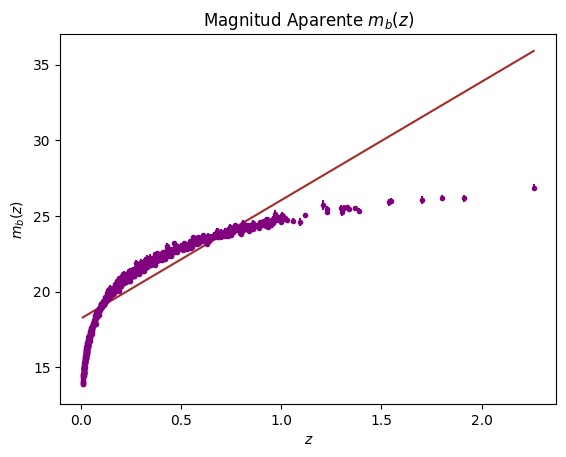

In [60]:
#m_b

# Ajuste Lineal

coeficientes_m = np.polyfit(z_cmb, m_b, 1)

polinomio_m = np.poly1d(coeficientes_m)

print("Polinomio ajustado:", polinomio)

# Genera puntos para la curva ajustada
z_ajuste_m = np.linspace(min(z_cmb), max(z_cmb), 100)
m_ajuste = polinomio_m(z_ajuste_m)


plt.errorbar(z_cmb, m_b, yerr=desv_m, fmt='.', label='Error asociado', color = 'purple')
plt.plot(z_ajuste_m, m_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$m_b(z)$')
plt.title('Magnitud Aparente $m_b(z)$')

## $H(z)$ a partir de la relación: $$H(z) = c(\frac{d}{dz}\frac{D_L(z)}{1+z})^{-1}$$

Con esto llegamos a un gráfico de $H(z)$ pero con los datos de Pantheon, hecho que nos deja comparar este gráfico con el que obtuvimos de los datos de la Tabla $4$. Lo intenté hacer de dos formas: 

1. Calculando la derivada centrada. 
2. Usando np.gradient para calcular la derivada. 

Ambas me dieron resultados similares pero que no coinciden con la apariencia general de $H(z)$ que, según los resultados de los datos anteriores y de otros trabajos, debería ser alguna curva creciente. 

C:\Users\ximen\AppData\Local\Temp\ipykernel_20064\2964792844.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  H_DL[i] = c*(1/derivada[i])


Text(0.5, 1.0, '$H(z)$ calculado a partir de $D_L$')

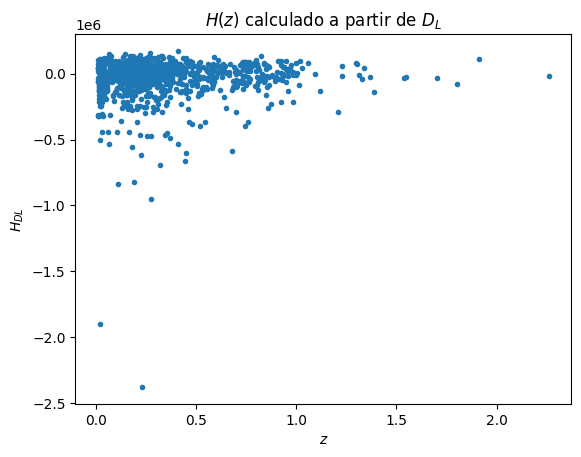

In [61]:
f = np.zeros(len(D_L))
derivada = np.zeros(len(D_L))
H_DL = np.zeros(len(D_L))

c = 3e8

for i in range(len(D_L)-1): 
    f[i] = D_L[i]/(1+z_cmb[i])
    derivada[i] = (f[i+1] - f[i-1])/(2*(z_cmb[i+1] - z_cmb[i-1]))

for i in range(len(D_L)-1): 
    H_DL[i] = c*(1/derivada[i])

#for i in range(len(D_L) - 1): 
#   if H_DL[i] > 4e6:
#      H_DL[i] = 0

plt.plot(z_cmb, H_DL, '.')
plt.ylabel('$H_{DL}$')
plt.xlabel('$z$')
plt.title('$H(z)$ calculado a partir de $D_L$')

    

Text(0.5, 1.0, '$H(z)$ calculado a partir de $D_L$ con np.gradient')

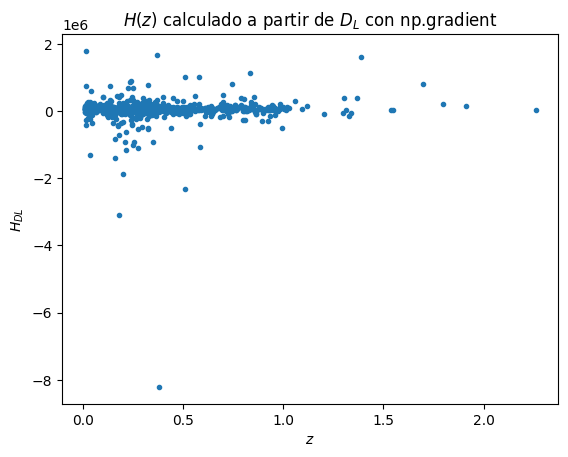

In [65]:
derivative = np.gradient(D_L / (1 + z_cmb), z_cmb)
H_DL = c*(1/derivative)

plt.plot(z_cmb, H_DL, '.')
plt.ylabel('$H_{DL}$')
plt.xlabel('$z$')
plt.title('$H(z)$ calculado a partir de $D_L$ con np.gradient')
